# Notebook for filter visualisation
A special, shorter net is trained to be able to visualise more of the filters.
This Notebook could be improved by making a more fancy-shmancy visualisation

In [1]:
import sys

# -------------Torch-------------------
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

from laplacian import normalized_laplacian

sys.path.insert(0, "lib/")
%load_ext autoreload
%autoreload 2

# Dataset

In [2]:
# Downloads the dataset if not found locally
from Dataset import check_mnist_dataset_exists, datasampler, MNISTDataset

_ = check_mnist_dataset_exists()

nb_selected_train_data = 640
nb_selected_test_data = 128

train_data, train_labels, test_data, test_labels = datasampler(
    nb_selected_train_data, nb_selected_test_data
)

trainset = MNISTDataset(train_data, train_labels)
testset = MNISTDataset(test_data, test_labels)

# Model

In [3]:
from model import SmallCheb
# model_parameters for smallercheby
in_features = 1
first_conv_out = 5
hidden_layer_classifier = 512
k = 3
n_classes = trainset.num_classes

net = SmallCheb(
    in_features, first_conv_out, hidden_layer_classifier, n_classes, k
)

print(net)
if torch.cuda.is_available():
    net.to(device)

SmallCheb(
  (layers): ModuleList(
    (0): Chebyconv(
      (apply_mod): NodeApplyModule(
        (linear): Linear(in_features=3, out_features=5, bias=True)
      )
    )
  )
  (classify): Sequential(
    (0): Linear(in_features=3920, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [4]:
from utils import load_model
net.load_state_dict(load_model('SmallerCheby'))

<All keys matched successfully>

In [5]:
import copy
f = copy.deepcopy(net)

In [6]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
        
    def forward(self, x):
        return x
    
f.classify = Identity()
print(f)

SmallCheb(
  (layers): ModuleList(
    (0): Chebyconv(
      (apply_mod): NodeApplyModule(
        (linear): Linear(in_features=3, out_features=5, bias=True)
      )
    )
  )
  (classify): Identity()
)


# Dirac

In [7]:
dirac = torch.ones(28*28)
dirac[28*14+14] = 100
g,l,s = testset[0]
s = dirac

In [8]:
f.eval()
L = normalized_laplacian(g)
pred = f(g, s, L)

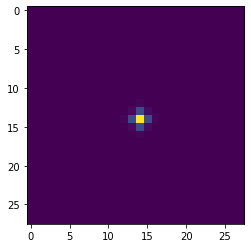

In [9]:
#%matplotlib inline
plt.imshow(pred.squeeze()[::5].view(28,-1).detach().numpy())

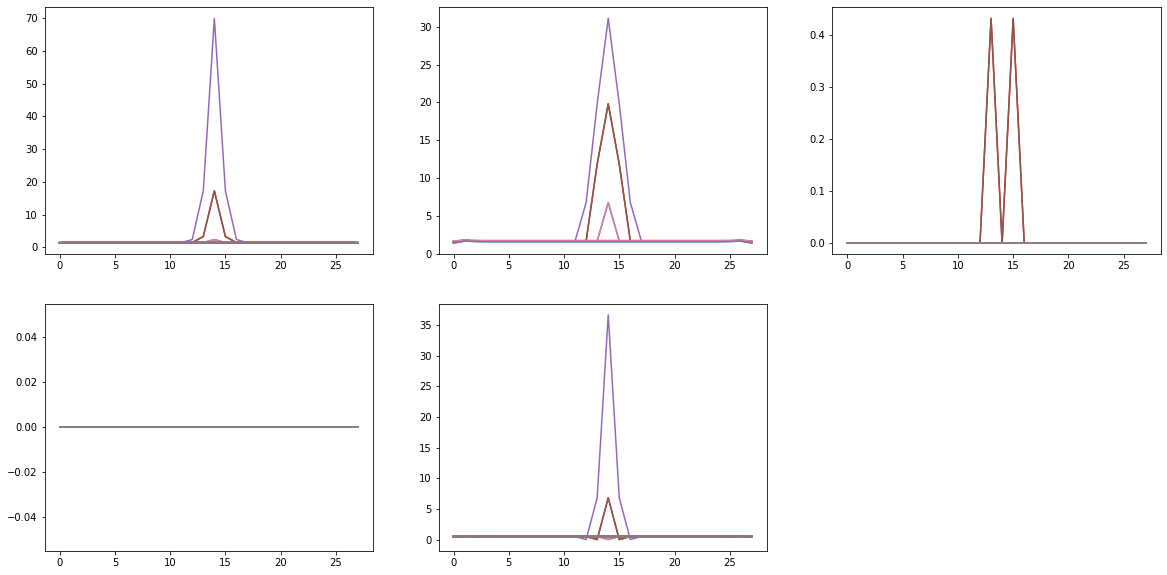

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(2, 3, 1)
plt.plot(pred.squeeze()[0::5].view(28,-1).detach().numpy())

plt.subplot(2, 3, 2)
plt.plot(pred.squeeze()[1::5].view(28,-1).detach().numpy())

plt.subplot(2, 3, 3)
plt.plot(pred.squeeze()[2::5].view(28,-1).detach().numpy())

plt.subplot(2, 3, 4)
plt.plot(pred.squeeze()[3::5].view(28,-1).detach().numpy())

plt.subplot(2, 3, 5)
plt.plot(pred.squeeze()[4::5].view(28,-1).detach().numpy())

plt.show()

# MNIST

In [11]:
dirac = torch.ones(28*28)
dirac[28*14+14] = 100
g,l,s = testset[3]
f.eval()
L = normalized_laplacian(g)
pred = f(g, s, L)


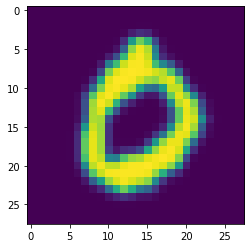

In [12]:
#%matplotlib inline
plt.imshow(pred.squeeze()[::5].view(28,-1).detach().numpy())

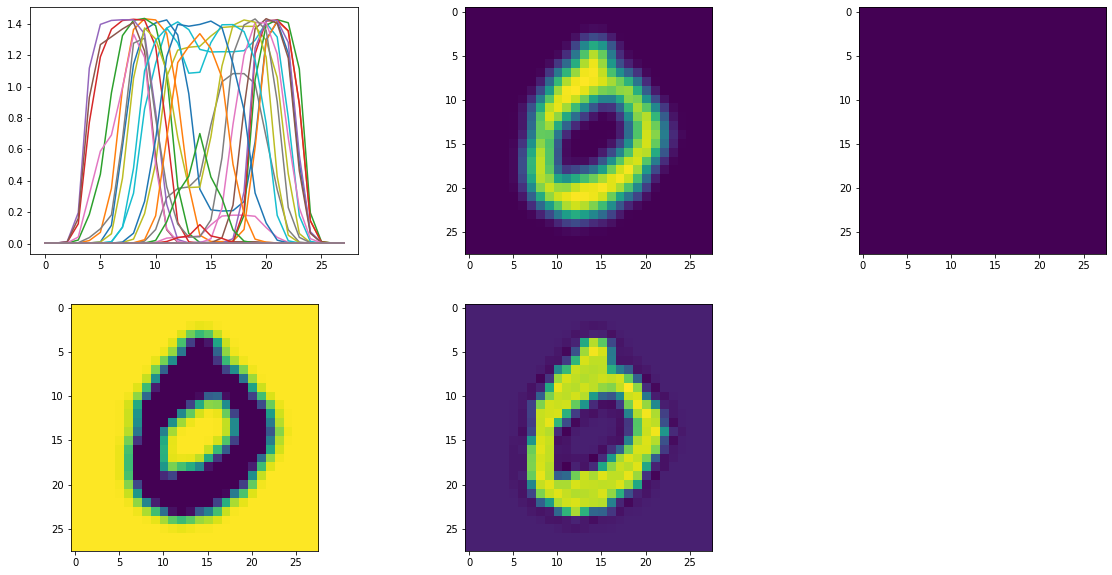

In [13]:
plt.figure(figsize=(20,10)) 
plt.subplot(2, 3, 1)
plt.plot(pred.squeeze()[0::5].view(28,-1).detach().numpy())

plt.subplot(2, 3, 2)
plt.imshow(pred.squeeze()[1::5].view(28,-1).detach().numpy())

plt.subplot(2, 3, 3)
plt.imshow(pred.squeeze()[2::5].view(28,-1).detach().numpy())

plt.subplot(2, 3, 4)
plt.imshow(pred.squeeze()[3::5].view(28,-1).detach().numpy())

plt.subplot(2, 3, 5)
plt.imshow(pred.squeeze()[4::5].view(28,-1).detach().numpy())

plt.show()